---
## Load Data

In [150]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# from sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [151]:
#youth_crime = pd.read_csv('../data/state_demo_crime_youth_data_combined_clean.csv')
#youth_crime =pd.read_csv('../data/data.csv')
youth_crime =pd.read_csv('../data/data_engineered.csv')
youth_crime.head()

,state,year,total_pop,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,multi_race_pop,...,youth_living_in_poverty,total_crime_count,log_total_crime_count,youth_school_poverty_interaction,poverty_income_interaction,unemployment_youth_interaction,poverty_rate_squared,median_income_squared,poverty_to_income_ratio,youth_to_total_pop_ratio
0,AL,2022,4916000,0.645,0.252,0.0480,0.0140,0.002,0.0,0.039,...,240000.000000,19732.5,9.890073,9928.0,8147.76,1825.0,0.018496,3589208100,0.000002,0.014849
1,AL,2021,4900800,0.644,0.255,0.0470,0.0130,0.004,0.0,0.037,...,245000.000000,14934.0,9.611463,13674.0,9051.87,2924.0,0.025281,3241024900,0.000003,0.017548
2,AL,2020,4833950,0.649,0.260,0.0455,0.0135,0.004,0.0,0.028,...,249833.333333,1116.5,7.018849,12218.0,8148.81,5248.0,0.022201,2990996100,0.000003,0.016963
3,AL,2019,4767100,0.654,0.265,0.0440,0.0140,0.004,0.0,0.019,...,228000.000000,404.0,6.003887,9546.0,7249.80,2368.0,0.016641,3158440000,0.000002,0.015523
4,AL,2018,4752600,0.656,0.265,0.0430,0.0130,0.010,0.0,0.019,...,255000.000000,138.0,4.934474,13760.0,7990.40,3354.0,0.025600,2494003600,0.000003,0.018095


In [152]:
# Define features (X) and target variable (y)

# columns to exclude: population-related and crime-related features
crime_related_columns = [
    'crimes_against_society',
    'fraud_and_other_financial_crimes',
    'property_crime',
    'violent_crime',
    'total_crime_count',
    'log_total_crime_count'
]

population_related_columns = [
    'total_pop',
    'white_pop',
    'black_pop',
    'hispanic_pop',
    'asian_pop',
    'native_pop',
    'islander_pop',
    'multi_race_pop',
    'state'
]



#features to keep: exclude population-related and crime-related features
X = youth_crime.drop(columns=crime_related_columns + population_related_columns)

# Display the list of features used for modeling
filtered_features = X.columns.tolist()
print(filtered_features)


y = youth_crime['log_total_crime_count']



['year', 'median_income', 'poverty_rate', 'unemployment_rate', 'unemployed_15_weeks', 'labor_force_participation_rate', 'hs_grad_rate', 'bachelors_grad_rate', 'zhvi', 'crude_rate_suicide', 'crude_rate_od', 'youth_not_in_school', 'youth_in_foster_care', 'youth_living_in_poverty', 'youth_school_poverty_interaction', 'poverty_income_interaction', 'unemployment_youth_interaction', 'poverty_rate_squared', 'median_income_squared', 'poverty_to_income_ratio', 'youth_to_total_pop_ratio']


In [153]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (249, 21)
X_test shape: (63, 21)
y_train shape: (249,)
y_test shape: (63,)


In [154]:
'''
# Preprocessing: Encode year, one-hot encode state, and standardize numeric features
columns_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'), ['state']),
        ('ordinal', OrdinalEncoder(), ['year']),
        ('num', StandardScaler(),[ 'median_income', 'poverty_rate', 'unemployment_rate', 'unemployed_15_weeks', 'labor_force_participation_rate', 'hs_grad_rate', 'bachelors_grad_rate', 'zhvi', 'crude_rate_suicide', 'crude_rate_od', 'youth_not_in_school', 'youth_in_foster_care', 'youth_living_in_poverty'])
    ],
 remainder='passthrough'
)'''

"\n# Preprocessing: Encode year, one-hot encode state, and standardize numeric features\ncolumns_trans = ColumnTransformer(\n    transformers=[\n        ('onehot', OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'), ['state']),\n        ('ordinal', OrdinalEncoder(), ['year']),\n        ('num', StandardScaler(),[ 'median_income', 'poverty_rate', 'unemployment_rate', 'unemployed_15_weeks', 'labor_force_participation_rate', 'hs_grad_rate', 'bachelors_grad_rate', 'zhvi', 'crude_rate_suicide', 'crude_rate_od', 'youth_not_in_school', 'youth_in_foster_care', 'youth_living_in_poverty'])\n    ],\n remainder='passthrough'\n)"

### Train-Test Split

In [156]:
# create features matrix
#X = youth_crime[numerical_features + ordinal_features + nominal_features]
'''
# create target variable, log target variable
#y = youth_crime['log_total_youth_crime']

# process X
X_process = columns_trans.fit_transform(X)

# save features
X_process_features = columns_trans.fit(X).get_feature_names_out()

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_process, y,
                                                    random_state = 42,
                                                    test_size = 0.2)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')'''

"\n# create target variable, log target variable\n#y = youth_crime['log_total_youth_crime']\n\n# process X\nX_process = columns_trans.fit_transform(X)\n\n# save features\nX_process_features = columns_trans.fit(X).get_feature_names_out()\n\n# train-test split\nX_train, X_test, y_train, y_test = train_test_split(X_process, y,\n                                                    random_state = 42,\n                                                    test_size = 0.2)\n\nprint(f'X_train shape: {X_train.shape}')\nprint(f'X_test shape: {X_test.shape}')\nprint(f'y_train shape: {y_train.shape}')\nprint(f'y_test shape: {y_test.shape}')"

---
## Create Models

###  Decision Tree Model

In [159]:
# establish Logistic Regression pipeline with CountVectorizer
pipe_dt = Pipeline([
    ('dt', DecisionTreeRegressor(random_state = 123,
                                 max_depth = 5,
                                 min_samples_split = 7,
                                 min_samples_leaf = 3,
                                 ccp_alpha = 0.01))
])
# calculate cross validation score mean
print(f'Cross Validation mean: {cross_val_score(pipe_dt, X_train, y_train, cv = 3).mean()}')

# fit model to training data
pipe_dt.fit(X_train, y_train)
# Make predictions
y_train_pred = pipe_dt.predict(X_train)
y_test_pred = pipe_dt.predict(X_test)
#Evaluate Model
print(" Decision Tree Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Cross Validation mean: -0.20030110208078802
 Decision Tree Model
Training MSE: 0.5277586237299329
Training MAE: 0.5341112735453646
Training R2 0.6819737143455471
Testing MSE: 1.1889304674591739
Testing MAE: 0.8051400335616685
Testing R2: 0.20174267041893634


### GridSearch DecisionTree

In [161]:
grid_dt = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 123),
                    param_grid = {'max_depth': range(2,8,1),
                                  'min_samples_split': range(8,25,3),
                                  'min_samples_leaf': range(2,7),
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]},
                    cv = 5,
                    verbose = 1)

In [162]:
# start timer
t0 = time.time()

# print start time
print(t0)

# gridsearch
grid_dt.fit(X_train, y_train)

# print end time
print(time.time() - t0)

1730312435.861992
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
13.542063236236572


In [163]:
best_model_dt = grid_dt.best_estimator_

best_model_dt

DecisionTreeRegressor(ccp_alpha=0, max_depth=6, min_samples_leaf=2,
                      min_samples_split=17, random_state=123)

In [164]:
grid_dt.best_score_

0.1458258005287376

In [165]:
# Make predictions
y_train_pred = grid_dt.predict(X_train)
y_test_pred = grid_dt.predict(X_test)
#Evaluate Model
print(" Grid Search Decision Tree Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

 Grid Search Decision Tree Model
Training MSE: 0.43245019025236187
Training MAE: 0.45555550607253154
Training R2 0.7394063847511889
Testing MSE: 1.4352131510240445
Testing MAE: 0.8995395981725129
Testing R2: 0.03638652665327702


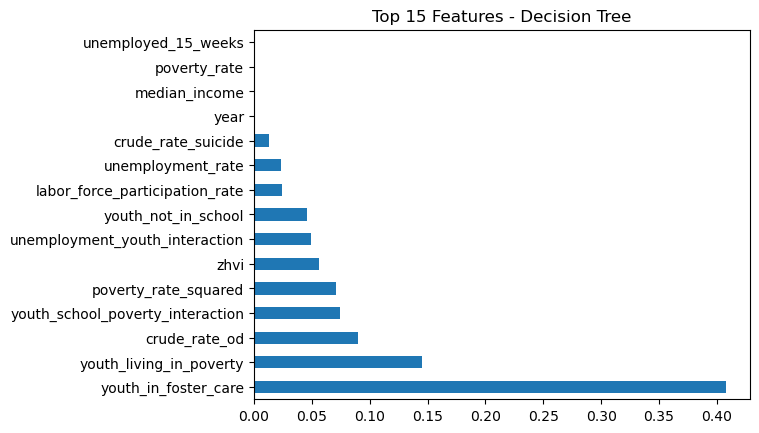

In [166]:
feat_importances = pd.Series(best_model_dt.feature_importances_, index = X_train.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.title('Top 15 Features - Decision Tree')

plt.show()

### Random Forest Model

In [168]:
# 
pipe_rf = Pipeline([
    ('rf', RandomForestRegressor(random_state = 42,
                                 max_depth = 5,
                                 min_samples_split = 7,
                                 min_samples_leaf = 3,
                                 ccp_alpha = 0.01))
])

In [169]:
# calculate cross validation score mean
print(f'Cross Validation mean: {cross_val_score(pipe_rf, X_train, y_train, cv = 3).mean()}')

# fit model to training data
pipe_rf.fit(X_train, y_train)

# Make predictions
y_train_pred = pipe_rf.predict(X_train)
y_test_pred = pipe_rf.predict(X_test)
#Evaluate Model
print(" Random Forest Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

Cross Validation mean: 0.22588301964141685
 Random Forest Model
Training MSE: 0.46055831592837615
Training MAE: 0.4504711091932293
Training R2 0.7224684847273597
Testing MSE: 1.008162348737657
Testing MAE: 0.7376492156465246
Testing R2: 0.3231118166167023


### GridSearch RandomForest

In [171]:
grid_rf = GridSearchCV(estimator = RandomForestRegressor(random_state = 42, n_jobs = -1),
                    param_grid = {'max_depth': range(2,8,1),
                                  'min_samples_split': range(8,25,3),
                                  'min_samples_leaf': range(2,7),
                                  'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10]},
                    cv = 5,
                    verbose = 1)

In [172]:
# start timer
t0 = time.time()

# print start time
print(t0)

# gridsearch
grid_rf.fit(X_train, y_train)

# print end time
print(time.time() - t0)

1730312450.315281
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
490.8920340538025


In [173]:
best_model_rf = grid_rf.best_estimator_

best_model_rf

RandomForestRegressor(ccp_alpha=0.001, max_depth=7, min_samples_leaf=2,
                      min_samples_split=8, n_jobs=-1, random_state=42)

In [174]:
grid_rf.best_score_

0.32657594719913396

In [175]:
# Make predictions
y_train_pred = best_model_rf.predict(X_train)
y_test_pred = best_model_rf.predict(X_test)
#Evaluate Model
print(" Random Forest Model")
# training 
print(f'Training MSE: {mean_squared_error(y_train,y_train_pred)}')
print(f'Training MAE: {mean_absolute_error(y_train,y_train_pred)}')
print(f'Training R2 {r2_score(y_train,y_train_pred)}')

# test 
print(f'Testing MSE: {mean_squared_error(y_test,y_test_pred)}')
print(f'Testing MAE: {mean_absolute_error( y_test,y_test_pred)}')
print(f'Testing R2: {r2_score(y_test,y_test_pred)}')

 Random Forest Model
Training MSE: 0.33971250337738446
Training MAE: 0.3638215444267309
Training R2 0.7952899284223334
Testing MSE: 1.0428002783478743
Testing MAE: 0.7497230026117935
Testing R2: 0.299855636419757


In [176]:
print(f'Score on training set: {grid_rf.score(X_train, y_train)}')
print(f'Score on testing set: {grid_rf.score(X_test, y_test)}')

Score on training set: 0.7952899284223335
Score on testing set: 0.29985563641975677


Text(0.5, 1.0, 'Top 15 Features - Random Forest')

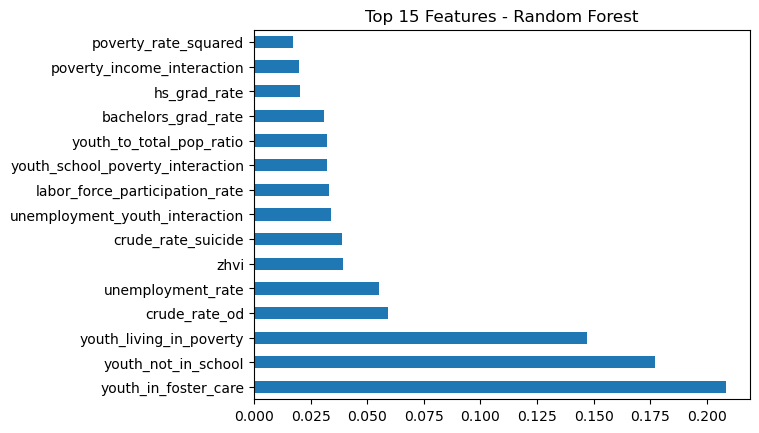

In [177]:
feat_importances = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.title('Top 15 Features - Random Forest')
